# **Grade Challenge 3**
### **HACTIV8 Full Time Data Science Phase 0**
Nama  : Ropiudin

Batch : FTDS OO2-HCK

Grade Challenge : Grade Challeng 3

# **Description**

## **Objectiv**

Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Business Knowledge & SQL Query. Pada Graded challenge ini menggunakan kumpulan data yang di ambil dari *bigquery-public-data* pada database thelook_ecommerce

## **Problem Statement**

Perusahaan akan meningkatkan total penjualan sebesar 10% melalui peningkatan banyaknya user yang melakukan transaksi berstatus complete di Q4 tahun 2022

## **Success Criteria berdasarkan SMART**

> **S** : Meningkatkan banyaknya user yang melakukan transaksi bersatus complete

> **M** : Dapat meningkatkan total penjualan sebesar 10% di awal Q4 tahun 2022

> **A** : Berdasarkan penjabaran - penjabaran analisa, akan diperoleh informasi peningkatan persentase total penjualan di tiap bulannya pada tahun 2022. Sehingga bisa mengukur realistis target yang ingin dicapai

> **R** : Sesuai dengan OKR perusahaan

> **T** : Dilakukan pada Q4 tahun 2022

# **Working Area**

## **Poin penjabaran**

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

from google.cloud import bigquery
project_id = "ropiudin" 
client = bigquery.Client(project=project_id)

Authenticated


### 1. Berapa jumlah transaksi yang berstatus Complete tiap bulan selama Q1 sampai Q3 di tahun 2022? Insight apa yang bisa kamu berikan?

In [2]:
df1 = client.query('''
SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month
ORDER BY year, month ASC)
''').to_dataframe()

In [3]:
df1

,year,month,quarter,jumlah_transaksi_complete
0,2022,1,1,30694
1,2022,2,1,28771
2,2022,3,1,36596
3,2022,4,2,39251
4,2022,5,2,42266
5,2022,6,2,43319
6,2022,7,3,54017
7,2022,8,3,61919
8,2022,9,3,68960


> Berdasarkan hasil analisa di atas, diperoleh informasi jumlah transaksi complete di setiap bulan selama Q1 sampai Q3 di tahun 2022. Dari hasil di atas diketahui bahwa terjadi kenaikan jumlah transaksi complete di setiap bulannya, akan tetapi pernah terjadi penurunan pada bulan ke-2 yaitu dari sebelumnya 30233 turun menjadi 30094 dan jumlah transaksi complete terbanyak yaitu pada bulan ke-9 sebanyak 69230. Sehingga dapat disimpulkan bahwa, terjadinya rata - rata peningkatan penjualan di setiap  bulan selama Q1 sampai Q3 di tahun 2022.

### 2. Berikan informasi total penjualan (dalam USD) tiap bulan selama Q1 sampai Q3 di tahun 2022! (Hanya yang transaksi berstatus Complete. Apa informasi yang bisa kamu sampaikan?

In [4]:
df2 = client.query('''
SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
total_penjualan
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
SUM(sale_price) AS total_penjualan
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month
ORDER BY year, month ASC)
''').to_dataframe()

In [5]:
df2

,year,month,quarter,jumlah_transaksi_complete,total_penjualan
0,2022,1,1,30694,1.831701e+06
1,2022,2,1,28771,1.703248e+06
2,2022,3,1,36596,2.235412e+06
3,2022,4,2,39251,2.404530e+06
4,2022,5,2,42266,2.462764e+06
5,2022,6,2,43319,2.580496e+06
6,2022,7,3,54017,3.374706e+06
7,2022,8,3,61919,3.700024e+06
8,2022,9,3,68960,4.100365e+06


> Berdasarkan hasil analisa di atas, diperoleh informasi total penjualan yang transaksi bersetatus complete di setiap bulan selama Q1 sampai Q3 di tahun 2022. Dari hasil di atas pula diketahui bahwa terjadi kenaikan total penjualan  di setiap bulannya yang mana total penjualan terbanyak yaitu pada bulan ke-9 sebesar 4284024.68 USD, sehingga dapat disimpulkan terjadinya peningkatan total penjualan di setiap bulan selama Q1 sampai Q3 di tahun 2022.

In [6]:
df2_1 = client.query('''
WITH cte AS (
SELECT year, month, total_penjualan,
ROW_NUMBER() over(ORDER BY month) AS rn1
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
total_penjualan
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
SUM(sale_price) AS total_penjualan
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month
ORDER BY year, month ASC)))

SELECT t1.month, t1.total_penjualan,
(t1.total_penjualan-t2.total_penjualan)*1.0/t2.total_penjualan*100 AS persentase_peningkatan_total_penjualan 
FROM cte t1
LEFT JOIN cte t2 ON t1.rn1 = t2.rn1+1
''').to_dataframe()

In [7]:
df2_1

,month,total_penjualan,persentase_peningkatan_total_penjualan
0,1,1.831701e+06,NaN
1,2,1.703248e+06,-7.012810
2,3,2.235412e+06,31.244112
3,4,2.404530e+06,7.565405
4,5,2.462764e+06,2.421847
5,6,2.580496e+06,4.780448
6,7,3.374706e+06,30.777444
7,8,3.700024e+06,9.639897
8,9,4.100365e+06,10.819952


> Berdasarkan hasil di atas, kita juga bisa mengetahui persentase kenaikan total penjualan di setiap bulan selama Q1 sampai Q3 di tahun 2022, yang mana dari hasil di atas diketahui bahwa kenaikan tertinggi terjadi pada bulan ke-9 atau bulan september yaitu naik sebesar 22.80% 

### 3. Berapa user yang melakukan transaksi berstatus Complete di tiap bulan dari Q1 sampai Q3 2022? Apa kesimpulanmu?

In [8]:
df3 = client.query('''
SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
jumlah_user
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
COUNT(DISTINCT user_id) AS jumlah_user
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month
ORDER BY year, month ASC)
''').to_dataframe()

In [9]:
df3

,year,month,quarter,jumlah_transaksi_complete,jumlah_user
0,2022,1,1,30694,1092
1,2022,2,1,28771,1019
2,2022,3,1,36596,1307
3,2022,4,2,39251,1404
4,2022,5,2,42266,1496
5,2022,6,2,43319,1542
6,2022,7,3,54017,1903
7,2022,8,3,61919,2184
8,2022,9,3,68960,2398


> Berdasarkan hasil analisa di atas, diperoleh informasi jumlah user yang melakukan transaksi berstatus Complete di tiap bulan dari Q1 sampai Q3 2022. Dari hasil di atas diketahui bahwa terjadi kenaikan jumlah user yang melakukan transaksi berstatus Complete di setiap bulannya, akan tetapi pernah terjadi penurunan pada bulan ke-2 yaitu dari sebelumnya 1102 user turun menjadi 1085 user dan jumlah user terbanyak yaitu pada bulan ke-9 sebanyak 2391 user. Sehingga dapat disimpulkan bahwa, terjadinya rata - rata peningkatan user di setiap bulan selama Q1 sampai Q3 di tahun 2022.

### 4. Kategori produk apa saja yang paling banyak dibeli (staus transaksi: Complete) di tiap bulannya selama Q1 sampai Q3 tahun 2022? Berikan insight!

In [10]:
df4 = client.query('''
SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_product_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
COUNT(product_category) AS total_product_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_product_category ASC)
''').to_dataframe()

In [11]:
df4

,year,month,quarter,jumlah_transaksi_complete,product_category,total_product_category
0,2022,1,1,42,Clothing Sets,42
1,2022,1,1,125,Jumpsuits & Rompers,125
2,2022,1,1,135,Suits,135
3,2022,1,1,309,Skirts,309
4,2022,1,1,511,Plus,511
...,...,...,...,...,...,...
229,2022,9,3,4442,Sleep & Lounge,4442
230,2022,9,3,4467,Shorts,4467
231,2022,9,3,4568,Tops & Tees,4568
232,2022,9,3,4910,Intimates,4910


> Dari hasil analisa di atas diperoleh Kategori produk apa saja yang paling banyak dibeli di tiap bulannya selama Q1 sampai Q3 tahun 2022. Akan tetapi dari output di atas perlu dipisahkan berdasarkan bulannya, supaya di ketahui kategori produk apa saja yang paling banyak di beli di tiap bulannya selama Q1 sampai Q3 tahun 2022. 

> Berikut di bawah ini merupakan kategori produk apa saja yang paling banyak di beli di tiap bulannya selama Q1 sampai Q3 tahun 2022 

In [12]:
df4_1 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_product_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
COUNT(product_category) AS total_product_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_product_category ASC))
WHERE month = 1
''').to_dataframe()

df4_1

,year,month,quarter,jumlah_transaksi_complete,product_category,total_product_category
0,2022,1,1,42,Clothing Sets,42
1,2022,1,1,125,Jumpsuits & Rompers,125
2,2022,1,1,135,Suits,135
3,2022,1,1,309,Skirts,309
4,2022,1,1,511,Plus,511
5,2022,1,1,581,Socks & Hosiery,581
6,2022,1,1,620,Leggings,620
7,2022,1,1,698,Suits & Sport Coats,698
8,2022,1,1,709,Pants & Capris,709
9,2022,1,1,774,Blazers & Jackets,774


> Pada bulan ke-1 atau bulan januari, kategori produk yang paling banyak di beli adalah kategori produk Tops & Tees sebanyak 2523. Sehingga dapat disimpulkan bahwa pada bulan januari produk yang paling banyak dicari atau di gemari adalah jenis produk Tops & Tees

In [13]:
df4_2 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_product_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
COUNT(product_category) AS total_product_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_product_category ASC))
WHERE month = 2
''').to_dataframe()

df4_2

,year,month,quarter,jumlah_transaksi_complete,product_category,total_product_category
0,2022,2,1,48,Clothing Sets,48
1,2022,2,1,112,Jumpsuits & Rompers,112
2,2022,2,1,217,Suits,217
3,2022,2,1,224,Blazers & Jackets,224
4,2022,2,1,296,Skirts,296
5,2022,2,1,364,Pants & Capris,364
6,2022,2,1,407,Socks & Hosiery,407
7,2022,2,1,482,Leggings,482
8,2022,2,1,522,Plus,522
9,2022,2,1,691,Suits & Sport Coats,691


> Pada bulan ke-2 atau bulan februari, kategori produk yang paling banyak di beli adalah kategori produk jeans sebanyak 2275 selisih 3 dengan kategori produk Shorts yaitu sebanyak 2272. Sehingga dapat disimpulkan bahwa pada bulan Februari produk yang paling banyak dicari atau di gemari adalah jenis produk Jeans dan Shorts

In [14]:
df4_3 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_product_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
COUNT(product_category) AS total_product_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_product_category ASC))
WHERE month = 3
''').to_dataframe()

df4_3

,year,month,quarter,jumlah_transaksi_complete,product_category,total_product_category
0,2022,3,1,17,Clothing Sets,17
1,2022,3,1,216,Jumpsuits & Rompers,216
2,2022,3,1,259,Suits,259
3,2022,3,1,298,Skirts,298
4,2022,3,1,533,Blazers & Jackets,533
5,2022,3,1,595,Pants & Capris,595
6,2022,3,1,649,Socks & Hosiery,649
7,2022,3,1,670,Plus,670
8,2022,3,1,674,Leggings,674
9,2022,3,1,890,Maternity,890


> Pada bulan ke-3 atau bulan Maret, kategori produk yang paling banyak di beli adalah kategori produk Intimates sebanyak 3021. Sehingga dapat disimpulkan bahwa pada bulan Maret produk yang paling banyak dicari atau di gemari adalah jenis produk Intimates

In [15]:
df4_4 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_product_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
COUNT(product_category) AS total_product_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_product_category ASC))
WHERE month = 4
''').to_dataframe()

df4_4

,year,month,quarter,jumlah_transaksi_complete,product_category,total_product_category
0,2022,4,2,72,Clothing Sets,72
1,2022,4,2,181,Suits,181
2,2022,4,2,184,Jumpsuits & Rompers,184
3,2022,4,2,291,Skirts,291
4,2022,4,2,555,Blazers & Jackets,555
5,2022,4,2,562,Socks & Hosiery,562
6,2022,4,2,617,Pants & Capris,617
7,2022,4,2,692,Leggings,692
8,2022,4,2,714,Plus,714
9,2022,4,2,979,Dresses,979


> Pada bulan ke-4 atau bulan April, kategori produk yang paling banyak di beli adalah kategori produk Jeans sebanyak 2934. Sehingga dapat disimpulkan bahwa pada bulan April produk yang paling banyak dicari atau di gemari adalah jenis produk Jeans

In [16]:
df4_5 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_product_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
COUNT(product_category) AS total_product_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_product_category ASC))
WHERE month = 5
''').to_dataframe()

df4_5

,year,month,quarter,jumlah_transaksi_complete,product_category,total_product_category
0,2022,5,2,45,Clothing Sets,45
1,2022,5,2,136,Jumpsuits & Rompers,136
2,2022,5,2,252,Suits,252
3,2022,5,2,524,Skirts,524
4,2022,5,2,553,Blazers & Jackets,553
5,2022,5,2,655,Leggings,655
6,2022,5,2,656,Pants & Capris,656
7,2022,5,2,874,Socks & Hosiery,874
8,2022,5,2,886,Plus,886
9,2022,5,2,1071,Dresses,1071


> Pada bulan ke-5 atau bulan Mei, kategori produk yang paling banyak di beli sama seperti pada bulan April yaitu kategori produk Jeans sebanyak 3180. Sehingga dapat disimpulkan bahwa pada bulan Mei produk yang paling banyak dicari atau di gemari adalah jenis produk Jeans

In [17]:
df4_6 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_product_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
COUNT(product_category) AS total_product_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_product_category ASC))
WHERE month = 6
''').to_dataframe()

df4_6

,year,month,quarter,jumlah_transaksi_complete,product_category,total_product_category
0,2022,6,2,8,Clothing Sets,8
1,2022,6,2,183,Suits,183
2,2022,6,2,200,Jumpsuits & Rompers,200
3,2022,6,2,395,Skirts,395
4,2022,6,2,633,Leggings,633
5,2022,6,2,715,Pants & Capris,715
6,2022,6,2,756,Blazers & Jackets,756
7,2022,6,2,792,Socks & Hosiery,792
8,2022,6,2,918,Plus,918
9,2022,6,2,1046,Maternity,1046


> Pada bulan ke-6 atau bulan Juni, kategori produk yang paling banyak di beli adalah kategori produk Shorts sebanyak 3456. Sehingga dapat disimpulkan bahwa pada bulan Juni produk yang paling banyak dicari atau di gemari adalah jenis produk Shorts

In [18]:
df4_7 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_product_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
COUNT(product_category) AS total_product_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_product_category ASC))
WHERE month = 7
''').to_dataframe()

df4_7

,year,month,quarter,jumlah_transaksi_complete,product_category,total_product_category
0,2022,7,3,86,Clothing Sets,86
1,2022,7,3,191,Jumpsuits & Rompers,191
2,2022,7,3,368,Suits,368
3,2022,7,3,632,Skirts,632
4,2022,7,3,672,Pants & Capris,672
5,2022,7,3,757,Blazers & Jackets,757
6,2022,7,3,824,Leggings,824
7,2022,7,3,969,Socks & Hosiery,969
8,2022,7,3,1140,Plus,1140
9,2022,7,3,1321,Dresses,1321


> Pada bulan ke-7 atau bulan Juli, kategori produk yang paling banyak di beli adalah kategori produk Jeans sebanyak 3641. Sehingga dapat disimpulkan bahwa pada bulan Juli produk yang paling banyak dicari atau di gemari adalah jenis produk Jeans

In [19]:
df4_8 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_product_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
COUNT(product_category) AS total_product_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_product_category ASC))
WHERE month = 8
''').to_dataframe()

df4_8

,year,month,quarter,jumlah_transaksi_complete,product_category,total_product_category
0,2022,8,3,61,Clothing Sets,61
1,2022,8,3,342,Jumpsuits & Rompers,342
2,2022,8,3,377,Suits,377
3,2022,8,3,637,Skirts,637
4,2022,8,3,906,Leggings,906
5,2022,8,3,967,Blazers & Jackets,967
6,2022,8,3,981,Pants & Capris,981
7,2022,8,3,1024,Socks & Hosiery,1024
8,2022,8,3,1066,Plus,1066
9,2022,8,3,1292,Maternity,1292


> Pada bulan ke-8 atau bulan Agustus, kategori produk yang paling banyak di beli adalah kategori produk Fashion Hoodies & Sweatshirts sebanyak 4247. Sehingga dapat disimpulkan bahwa pada bulan Agustus produk yang paling banyak dicari atau di gemari adalah jenis produk Fashion Hoodies & Sweatshirts

In [20]:
df4_9 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_product_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
COUNT(product_category) AS total_product_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_product_category ASC))
WHERE month = 9
''').to_dataframe()

df4_9

,year,month,quarter,jumlah_transaksi_complete,product_category,total_product_category
0,2022,9,3,75,Clothing Sets,75
1,2022,9,3,311,Suits,311
2,2022,9,3,453,Jumpsuits & Rompers,453
3,2022,9,3,612,Skirts,612
4,2022,9,3,821,Blazers & Jackets,821
5,2022,9,3,1071,Pants & Capris,1071
6,2022,9,3,1077,Leggings,1077
7,2022,9,3,1228,Socks & Hosiery,1228
8,2022,9,3,1575,Plus,1575
9,2022,9,3,1670,Maternity,1670


> Pada bulan ke-9 atau bulan September, kategori produk yang paling banyak di beli adalah kategori produk Tops & Tees sebanyak 5500. Sehingga dapat disimpulkan bahwa pada bulan September produk yang paling banyak dicari atau di gemari adalah jenis produk Tops & Tees

> Dari uraian analisa di atas dapat disimpulkan bahwa jenis kategori produk yang paling banyak dibeli di tiap bulannya selama Q1 sampai Q3 tahun 2022 memiliki kategori produk yang berbeda - beda di setiap bulannya, sehingga perusahaan perlu mempertimbangkan akan hal itu. 

### 5. Kategori produk apa saja yang paling banyak mendapatkan pendapatan (staus transaksi: Complete) di tiap bulannya selama Q1 sampai Q3 tahun 2022? Berikan insight!

In [21]:
df5 = client.query('''
SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_penjualan_perproduct_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
SUM(sale_price) AS total_penjualan_perproduct_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_penjualan_perproduct_category ASC)
''').to_dataframe()

In [22]:
df5

,year,month,quarter,jumlah_transaksi_complete,product_category,total_penjualan_perproduct_category
0,2022,1,1,42,Clothing Sets,3683.579979
1,2022,1,1,125,Jumpsuits & Rompers,6788.920005
2,2022,1,1,581,Socks & Hosiery,8822.680018
3,2022,1,1,135,Suits,11867.520180
4,2022,1,1,866,Socks,15233.599957
...,...,...,...,...,...,...
229,2022,9,3,4249,Swim,262169.069876
230,2022,9,3,4072,Sweaters,298719.389708
231,2022,9,3,2326,Suits & Sport Coats,313278.838659
232,2022,9,3,5091,Jeans,493227.380836


> Dari hasil analisa di atas diperoleh Kategori produk apa saja yang paling banyak mendapatkan pendapatan di tiap bulannya selama Q1 sampai Q3 tahun 2022. Akan tetapi dari output di atas perlu dipisahkan berdasarkan bulannya, supaya di ketahui kategori produk apa saja yang paling banyak mendapatkan pendapatan di tiap bulannya selama Q1 sampai Q3 tahun 2022.

> Berikut di bawah ini merupakan Kategori produk apa saja yang paling banyak mendapatkan pendapatan di tiap bulannya selama Q1 sampai Q3 tahun 2022

In [23]:
df5_1 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_penjualan_perproduct_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
SUM(sale_price) AS total_penjualan_perproduct_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_penjualan_perproduct_category ASC))
WHERE month = 1
''').to_dataframe()

df5_1

,year,month,quarter,jumlah_transaksi_complete,product_category,total_penjualan_perproduct_category
0,2022,1,1,42,Clothing Sets,3683.579979
1,2022,1,1,125,Jumpsuits & Rompers,6788.920005
2,2022,1,1,581,Socks & Hosiery,8822.680018
3,2022,1,1,135,Suits,11867.520180
4,2022,1,1,866,Socks,15233.599957
5,2022,1,1,620,Leggings,19177.379891
6,2022,1,1,511,Plus,23840.089973
7,2022,1,1,309,Skirts,24041.010056
8,2022,1,1,709,Pants & Capris,33041.679987
9,2022,1,1,822,Maternity,37546.420020


> Pada bulan ke-1 atau bulan januari, kategori produk yang paling banyak mendapatkan pendapatan adalah kategori produk Outerwear & Coats sebanyak 271039.75 USD. Sehingga dapat disimpulkan bahwa pada bulan januari produk yang paling banyak mendapatkan pendapatan adalah jenis produk Outerwear & Coats

In [24]:
df5_2 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_penjualan_perproduct_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
SUM(sale_price) AS total_penjualan_perproduct_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_penjualan_perproduct_category ASC))
WHERE month = 2
''').to_dataframe()

df5_2

,year,month,quarter,jumlah_transaksi_complete,product_category,total_penjualan_perproduct_category
0,2022,2,1,112,Jumpsuits & Rompers,2142.920008
1,2022,2,1,48,Clothing Sets,4589.609974
2,2022,2,1,407,Socks & Hosiery,6081.599957
3,2022,2,1,482,Leggings,11431.139964
4,2022,2,1,224,Blazers & Jackets,14638.809976
5,2022,2,1,522,Plus,16528.230123
6,2022,2,1,364,Pants & Capris,18717.269964
7,2022,2,1,1239,Socks,22744.869949
8,2022,2,1,217,Suits,25022.090103
9,2022,2,1,296,Skirts,29712.150024


> Pada bulan ke-2 atau bulan Februari, kategori produk yang paling banyak mendapatkan pendapatan adalah kategori produk Outerwear & Coats sebanyak 263458.18 USD. Sehingga dapat disimpulkan bahwa pada bulan Februari produk yang paling banyak mendapatkan pendapatan adalah jenis produk Outerwear & Coats

In [25]:
df5_3 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_penjualan_perproduct_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
SUM(sale_price) AS total_penjualan_perproduct_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_penjualan_perproduct_category ASC))
WHERE month = 3
''').to_dataframe()

df5_3

,year,month,quarter,jumlah_transaksi_complete,product_category,total_penjualan_perproduct_category
0,2022,3,1,17,Clothing Sets,2501.210083
1,2022,3,1,216,Jumpsuits & Rompers,6089.640018
2,2022,3,1,649,Socks & Hosiery,9670.549995
3,2022,3,1,298,Skirts,11169.340027
4,2022,3,1,674,Leggings,22375.659904
5,2022,3,1,670,Plus,28771.390017
6,2022,3,1,259,Suits,33486.230495
7,2022,3,1,595,Pants & Capris,37536.379881
8,2022,3,1,890,Maternity,44283.619877
9,2022,3,1,1784,Underwear,45202.050067


> Pada bulan ke-3 atau bulan Maret, kategori produk yang paling banyak mendapatkan pendapatan adalah kategori produk Outerwear & Coats sebanyak 362484.79 USD. Sehingga dapat disimpulkan bahwa pada bulan Maret produk yang paling banyak mendapatkan pendapatan adalah jenis produk Outerwear & Coats

In [26]:
df5_4 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_penjualan_perproduct_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
SUM(sale_price) AS total_penjualan_perproduct_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_penjualan_perproduct_category ASC))
WHERE month = 4
''').to_dataframe()

df5_4

,year,month,quarter,jumlah_transaksi_complete,product_category,total_penjualan_perproduct_category
0,2022,4,2,72,Clothing Sets,7823.779953
1,2022,4,2,562,Socks & Hosiery,7978.539948
2,2022,4,2,184,Jumpsuits & Rompers,9411.780066
3,2022,4,2,291,Skirts,10632.589980
4,2022,4,2,692,Leggings,22088.750045
5,2022,4,2,181,Suits,22641.840229
6,2022,4,2,1512,Socks,25497.680022
7,2022,4,2,617,Pants & Capris,32926.870129
8,2022,4,2,555,Blazers & Jackets,43559.290019
9,2022,4,2,1657,Underwear,44293.490075


> Pada bulan ke-4 atau bulan April, kategori produk yang paling banyak mendapatkan pendapatan adalah kategori produk Outerwear & Coats sebanyak 403362.68 USD. Sehingga dapat disimpulkan bahwa pada bulan April produk yang paling banyak mendapatkan pendapatan adalah jenis produk Outerwear & Coats

In [27]:
df5_5 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_penjualan_perproduct_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
SUM(sale_price) AS total_penjualan_perproduct_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_penjualan_perproduct_category ASC))
WHERE month = 5
''').to_dataframe()

df5_5

,year,month,quarter,jumlah_transaksi_complete,product_category,total_penjualan_perproduct_category
0,2022,5,2,136,Jumpsuits & Rompers,3286.310010
1,2022,5,2,45,Clothing Sets,5830.629967
2,2022,5,2,874,Socks & Hosiery,12189.889928
3,2022,5,2,524,Skirts,19188.479995
4,2022,5,2,655,Leggings,20949.479899
5,2022,5,2,252,Suits,21898.870340
6,2022,5,2,1642,Socks,27637.450071
7,2022,5,2,886,Plus,29629.520226
8,2022,5,2,656,Pants & Capris,31309.290130
9,2022,5,2,1080,Maternity,53660.679682


> Pada bulan ke-5 atau bulan Mei, kategori produk yang paling banyak mendapatkan pendapatan adalah kategori produk Jeans sebanyak 345940.67 USD. Sehingga dapat disimpulkan bahwa pada bulan Mei produk yang paling banyak mendapatkan pendapatan adalah jenis produk Jeans

In [28]:
df5_6 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_penjualan_perproduct_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
SUM(sale_price) AS total_penjualan_perproduct_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_penjualan_perproduct_category ASC))
WHERE month = 6
''').to_dataframe()

df5_6

,year,month,quarter,jumlah_transaksi_complete,product_category,total_penjualan_perproduct_category
0,2022,6,2,8,Clothing Sets,159.919998
1,2022,6,2,200,Jumpsuits & Rompers,11699.100024
2,2022,6,2,792,Socks & Hosiery,12558.809949
3,2022,6,2,633,Leggings,12894.849904
4,2022,6,2,183,Suits,20851.150072
5,2022,6,2,395,Skirts,23324.700226
6,2022,6,2,918,Plus,38385.370316
7,2022,6,2,715,Pants & Capris,39999.590197
8,2022,6,2,1046,Maternity,51113.459916
9,2022,6,2,1929,Underwear,51238.759905


> Pada bulan ke-6 atau bulan Juni, kategori produk yang paling banyak mendapatkan pendapatan adalah kategori produk Outerwear & Coats sebanyak 371968.79 USD. Sehingga dapat disimpulkan bahwa pada bulan Juni produk yang paling banyak mendapatkan pendapatan adalah jenis produk Outerwear & Coats

In [29]:
df5_7 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_penjualan_perproduct_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
SUM(sale_price) AS total_penjualan_perproduct_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_penjualan_perproduct_category ASC))
WHERE month = 7
''').to_dataframe()

df5_7

,year,month,quarter,jumlah_transaksi_complete,product_category,total_penjualan_perproduct_category
0,2022,7,3,86,Clothing Sets,6219.159996
1,2022,7,3,191,Jumpsuits & Rompers,11412.949984
2,2022,7,3,969,Socks & Hosiery,21348.579982
3,2022,7,3,824,Leggings,24451.369893
4,2022,7,3,2129,Socks,40042.450009
5,2022,7,3,1140,Plus,44720.270023
6,2022,7,3,632,Skirts,45351.090025
7,2022,7,3,368,Suits,49025.329613
8,2022,7,3,672,Pants & Capris,49724.730181
9,2022,7,3,757,Blazers & Jackets,65667.189731


> Pada bulan ke-7 atau bulan Juli, kategori produk yang paling banyak mendapatkan pendapatan adalah kategori produk Outerwear & Coats sebanyak 474448.14 USD. Sehingga dapat disimpulkan bahwa pada bulan Juli produk yang paling banyak mendapatkan pendapatan adalah jenis produk Outerwear & Coats

In [30]:
df5_8 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_penjualan_perproduct_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
SUM(sale_price) AS total_penjualan_perproduct_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_penjualan_perproduct_category ASC))
WHERE month = 8
''').to_dataframe()

df5_8

,year,month,quarter,jumlah_transaksi_complete,product_category,total_penjualan_perproduct_category
0,2022,8,3,61,Clothing Sets,6728.860023
1,2022,8,3,1024,Socks & Hosiery,17395.739983
2,2022,8,3,342,Jumpsuits & Rompers,17562.410234
3,2022,8,3,906,Leggings,20764.760054
4,2022,8,3,1066,Plus,32863.640255
5,2022,8,3,377,Suits,43176.399996
6,2022,8,3,637,Skirts,57428.530232
7,2022,8,3,981,Pants & Capris,58277.780190
8,2022,8,3,1292,Maternity,63706.250086
9,2022,8,3,3152,Socks,64745.899632


> Pada bulan ke-8 atau bulan Agustus, kategori produk yang paling banyak mendapatkan pendapatan adalah kategori produk Outerwear & Coats sebanyak 420152.05 USD. Sehingga dapat disimpulkan bahwa pada bulan Agustus produk yang paling banyak mendapatkan pendapatan adalah jenis produk Outerwear & Coats

In [31]:
df5_9 = client.query('''
SELECT *
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
product_category,
total_penjualan_perproduct_category
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
product_category,
SUM(sale_price) AS total_penjualan_perproduct_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month,total_penjualan_perproduct_category ASC))
WHERE month = 9
''').to_dataframe()

df5_9

,year,month,quarter,jumlah_transaksi_complete,product_category,total_penjualan_perproduct_category
0,2022,9,3,75,Clothing Sets,4782.859978
1,2022,9,3,1228,Socks & Hosiery,20252.640000
2,2022,9,3,453,Jumpsuits & Rompers,22254.020062
3,2022,9,3,612,Skirts,25372.100101
4,2022,9,3,1077,Leggings,28332.460047
5,2022,9,3,311,Suits,36404.950296
6,2022,9,3,1071,Pants & Capris,56876.890135
7,2022,9,3,2814,Socks,59323.189929
8,2022,9,3,821,Blazers & Jackets,61146.220404
9,2022,9,3,1575,Plus,62242.359805


> Pada bulan ke-9 atau bulan September, kategori produk yang paling banyak mendapatkan pendapatan adalah kategori produk Outerwear & Coats sebanyak 602894.10 USD. Sehingga dapat disimpulkan bahwa pada bulan September produk yang paling banyak mendapatkan pendapatan adalah jenis produk Outerwear & Coats

> Dari uraian analisa di atas dapat disimpulkan bahwa jenis kategori produk yang paling banyak mendapatkan pendapatan di tiap bulannya selama Q1 sampai Q3 tahun 2022 adalah kategori produk Outerwear & Coats. Walapun kategori produk Outerwear & Coats bukan merupakan kategori produk yang paling banyak di beli, akan tetapi kategori produk Outerwear & Coats merupakan kategori produk yang paling banyak mendapatkan pendapatan hal ini bisa di pengaruhi oleh faktor harga jual perproduk

### 6. Dibandingkan dengan jumlah transaksi dan total penjualan, mana yang paling berkaitan dengan jumlah user yang melakukan transaksi? Apa analisis yang dapat kamu jelaskan? (Hint: Kamu bisa menggunakan korelasi)

In [32]:
df6 = client.query('''
SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
total_penjualan,
jumlah_user
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
SUM(sale_price) AS total_penjualan,
COUNT(DISTINCT user_id) AS jumlah_user
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month
ORDER BY year, month ASC)
''').to_dataframe()

In [33]:
df6

,year,month,quarter,jumlah_transaksi_complete,total_penjualan,jumlah_user
0,2022,1,1,30694,1.831701e+06,1092
1,2022,2,1,28771,1.703248e+06,1019
2,2022,3,1,36596,2.235412e+06,1307
3,2022,4,2,39251,2.404530e+06,1404
4,2022,5,2,42266,2.462764e+06,1496
5,2022,6,2,43319,2.580496e+06,1542
6,2022,7,3,54017,3.374706e+06,1903
7,2022,8,3,61919,3.700024e+06,2184
8,2022,9,3,68960,4.100365e+06,2398


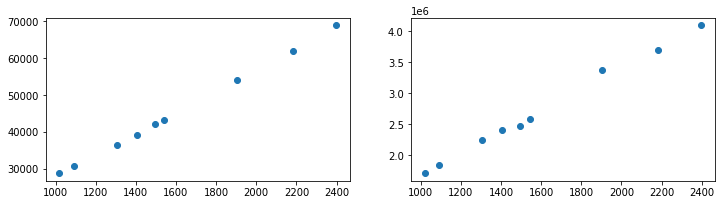

In [34]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize=(12,3))
ax[0].scatter(df6['jumlah_user'], df6['jumlah_transaksi_complete'])
ax[1].scatter(df6['jumlah_user'], df6['total_penjualan'])

In [35]:
df6_1 = client.query('''
SELECT jumlah_transaksi_complete, jumlah_user
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
total_penjualan,
jumlah_user
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
SUM(sale_price) AS total_penjualan,
COUNT(DISTINCT user_id) AS jumlah_user
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month
ORDER BY year, month ASC))
''').to_dataframe()

In [36]:
df6_1.corr()

,jumlah_transaksi_complete,jumlah_user
jumlah_transaksi_complete,1.000000,0.999757
jumlah_user,0.999757,1.000000


In [37]:
df6_2 = client.query('''
SELECT total_penjualan, jumlah_user
FROM(SELECT year, month, 
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
total_penjualan,
jumlah_user
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
SUM(sale_price) AS total_penjualan,
COUNT(DISTINCT user_id) AS jumlah_user
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month
ORDER BY year, month ASC))
''').to_dataframe()

In [38]:
df6_2.corr()

,total_penjualan,jumlah_user
total_penjualan,1.000000,0.997636
jumlah_user,0.997636,1.000000


> Berdasak hasil analisis dengan menggunakan statistik deskriptif yaitu korelasi di atas, di ketahui bahwa nilai korelasi antara jumlah transaksi complete dengan jumlah user adalah sebesar 0.998236 yang berarti antara jumlah transaksi complete dengan jumlah user memiliki hubungan yang kuat dan positif. Dimana setiap kenaikan nilai pada jumlah transaksi complete akan berpengaruh terhadap kenaikan nilai jumlah user 
 
> Sedangkan nilai korelasi antara total penjualan dengan jumlah user adalah sebesar 0.992084 yang berarti antara total penjualan dengan jumlah user memiliki hubungan yang kuat dan positif. Dimana setiap kenaikan nilai pada total penjualan akan berpengaruh terhadap kenaikan nilai jumlah user 

> Dari hasil di atas dapat disimpulkan bahwa, antara jumlah transaksi complete dan total penjualan yang paling berkaitan dengan jumlah user adalah jumlah transaksi complete. Hal ini dikarnakan nilai korelasi antara jumlah transaksi complete dengan jumlah user lebih besar dari pada nilai korelasi antara total penjualan dengan jumlah user

In [39]:
df7 = client.query('''
SELECT year, month,
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
total_penjualan,
jumlah_user,
product_category,
harga_jual_product_category,
jumlah_transaksi_complete*harga_jual_product_category AS GMV
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
SUM(sale_price) AS total_penjualan,
COUNT(DISTINCT user_id) AS jumlah_user,
product_category,
SUM(DISTINCT sale_price) AS harga_jual_product_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month ASC)
''').to_dataframe()

In [40]:
df7

,year,month,quarter,jumlah_transaksi_complete,total_penjualan,jumlah_user,product_category,harga_jual_product_category,GMV
0,2022,1,1,2156,78681.740251,113,Intimates,3020.880015,6.513017e+06
1,2022,1,1,2073,105768.590155,99,Fashion Hoodies & Sweatshirts,4333.740005,8.983843e+06
2,2022,1,1,698,79671.120365,30,Suits & Sport Coats,3318.440016,2.316271e+06
3,2022,1,1,1962,161387.790408,89,Sweaters,6608.180011,1.296525e+07
4,2022,1,1,1659,64644.149734,83,Accessories,2775.989989,4.605367e+06
...,...,...,...,...,...,...,...,...,...
229,2022,9,3,1071,56876.890135,59,Pants & Capris,2414.999999,2.586465e+06
230,2022,9,3,453,22254.020062,26,Jumpsuits & Rompers,979.060002,4.435142e+05
231,2022,9,3,1077,28332.460047,64,Leggings,1344.870003,1.448425e+06
232,2022,9,3,821,61146.220404,49,Blazers & Jackets,3014.180023,2.474642e+06


In [41]:
df8 = client.query('''
SELECT year, month,quarter,SUM(GMV) AS jumlah_GMV_perbulan
FROM(SELECT year, month,
CASE WHEN month <= 3 THEN 1
    WHEN month BETWEEN 4 AND 6 THEN 2
    WHEN month BETWEEN 7 AND 9 THEN 3
END AS quarter,
jumlah_transaksi_complete,
total_penjualan,
jumlah_user,
product_category,
harga_jual_product_category,
jumlah_transaksi_complete*harga_jual_product_category AS GMV
FROM(SELECT  
EXTRACT(year FROM items.created_at) AS year,
EXTRACT(month FROM items.created_at) AS month,
COUNT(status) AS jumlah_transaksi_complete,
SUM(sale_price) AS total_penjualan,
COUNT(DISTINCT user_id) AS jumlah_user,
product_category,
SUM(DISTINCT sale_price) AS harga_jual_product_category
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS items
ON items.product_id = inventory.product_id
WHERE status = 'Complete' AND EXTRACT(year FROM items.created_at) = 2022 AND EXTRACT(quarter FROM items.created_at) BETWEEN 1 AND 3
GROUP BY year,month,product_category
ORDER BY year, month ASC))
GROUP BY year,month,quarter
ORDER BY year, month ASC
''').to_dataframe()

In [42]:
df8

,year,month,quarter,jumlah_GMV_perbulan
0,2022,1,1,1.209704e+08
1,2022,2,1,1.030945e+08
2,2022,3,1,1.669864e+08
3,2022,4,2,1.903900e+08
4,2022,5,2,2.055832e+08
5,2022,6,2,2.238231e+08
6,2022,7,3,3.265820e+08
7,2022,8,3,4.302898e+08
8,2022,9,3,5.018289e+08


> Variabel df7 dan df8 merupakan output dataframe untuk melihat GMV disetiap kategori produknya dan GMV disetiap bulannya guna untuk menjawab Question no.3

## **Question**

### 1. Apakah problem statement yang kamu definisikan di awal dapat terukur ketercapaiannya? berikan pendapatmu!

> Dapat, karna berdasarkan historis data pada Q1 sampai Q3 tahun 2022 pernah terjadi peningkatan total penjualan sebesar 22,80%. Sehingga target peningkatan total penjualan sebesar 10% masih realistis dan dapat dicapai

### 2. Berdasarkan hasil analisis yang sudah kamu lakukan dari 6 penjabaran di atas, jika CEO perusahaanmu ingin menargetkan pendapatan di awal kuartal 4 harus mencapai $250000, apakah masuk akal?

> Masuk akal, karna berdasarkan hasil analisis di atas diketahui bahwa total penjualan tertinggi sebesar 4284024.68 USD. Sehingga jika CEO ingin menargetkan pendapatan di awal kuartal 4 sebesar 250000 USD masih masuk akal untuk dicapai

### 3. CEO kamu menargetkan di kuartal 4 ada investor yang dapat menyuntikan dana ke perusahaanmu, dimana investor akan melihat GMV selama 3 kuartal terakhir serta prospek kedepan minimal di kuartal 4 akan seperti apa. Berikan informasi kepada CEO mu berdasarkan trend transaksi, jumlah user yang bertransaksi, dan GMV 3 kuartal terakhir, apakah perusahaanmu layak atau tidak mendapatkan investor baru!

> Berdasarkan hasil analisis di atas, diketahui bahwa selama 3 kuartal terahir  jumlah trasnsaksi, jumlah user yang berteransaksi serta GMV memiliki peningkatan nilai di setiap bulannya atau memiliki trand yang naik disetiap bulannya. sehingga berdasarkan hasil analisis 3 kuartal terahir memiliki prospek yang baik untuk di kuartal 4, sehingga perusahaan layak untuk mendapatkan investor baru berdasarkan trand positif di 3 kuartal terahir.

# **Conclusions**

> Berdasarkan dari hasil analisis dari poin - poin penjabaran di atas, dapat disimpulkan bahwa problem statement yaitu Perusahaan akan meningkatkan total penjualan sebesar 10% melalui peningkatan banyaknya user yang melakukan transaksi berstatus complete di Q4 tahun 2022 secara realistis dapat tercapai